# Analyzing Prompt Neutrons

In [1]:
### initializations and import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%pylab inline

from CGMFtk import histories as fh

Populating the interactive namespace from numpy and matplotlib


In [16]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 18,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  3.1.3


First we load in the history file

In [2]:
hist = fh.Histories('98252sf.cgmf')

Many average quantities for the pre-fission and prompt neutrons can be calculated using the histories class

In [3]:
# the average neutron multiplicity
print ('nubar (per fission event) = ',hist.nubartot())
print ('average number of neutrons per fragment = ',hist.nubar())

nubar (per fission event) =  3.817616
average number of neutrons per fragment =  1.908808


Or we might want a list of the multiplicity of each event

In [7]:
nu = hist.getNutot()
print (nu[:10])
# hist.getNu() pulls the multiplicity for each fission fragment
# hist.getNuEvent() pulls the multiplicity for each event, not including pre-fission neutrons

[4 3 6 5 4 3 3 3 4 4]


Neutron energies in both the center of mass (of the compound nucleus) and the laboratory frame are available

In [8]:
Elab = hist.getNeutronElab()
Ecm = hist.getNeutronEcm()

These two functions provide a list of lists of neutron energies for each fragment.  Typically, more manipulation will be required to use these values for plotting.  For example, if we want to plot the neutron multiplicity and the total neutron energy of each event:

In [13]:
Elabtot = []
ElabEvent = Elab[::2]+Elab[1::2]
for x in ElabEvent:
    Elabtot.append(np.sum(x))

In [14]:
print (len(nu))
print (len(Elabtot))

500000
500000


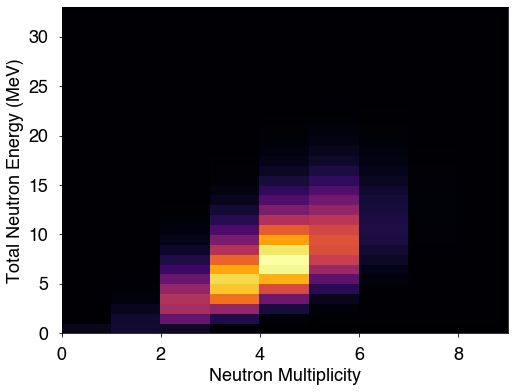

In [17]:
fig = plt.figure(figsize=(8,6))
bx = np.arange(min(nu),max(nu)+1)
by = np.arange(min(Elabtot),max(Elabtot)+1)

plt.hist2d(nu,Elabtot,bins=(bx,by))
plt.xlabel('Neutron Multiplicity')
plt.ylabel('Total Neutron Energy (MeV)')
plt.show()

There are also routines to calculate the neutron average energies

In [19]:
# average neutron energies
print ('Neutron energies in the lab:')
print ('Average energy of all neutrons = ',hist.meanNeutronElab())
print ('Average energy of neutrons from fragments = ',hist.meanNeutronElabFragments())
print ('Average energy of neutrons from light fragment = ',hist.meanNeutronElabLF())
print ('Average energy of neutrons from heavy fragment = ',hist.meanNeutronElabHF())
print (' ')
print ('Neutron energies in the center of mass:')
print ('Average energy of neutrons from fragments = ',hist.meanNeutronEcmFragments())
print ('Average energy of neutrons from light fragment = ',hist.meanNeutronEcmLF())
print ('Average energy of neutrons from heavy fragment = ',hist.meanNeutronEcmHF())

Neutron energies in the lab:
Average energy of all neutrons =  2.077427439009056
Average energy of neutrons from fragments =  2.077427439009056
Average energy of neutrons from light fragment =  2.3293141780172957
Average energy of neutrons from heavy fragment =  1.7574275095987781
 
Neutron energies in the center of mass:
Average energy of neutrons from fragments =  1.3025117701727997
Average energy of neutrons from light fragment =  1.3719594663675614
Average energy of neutrons from heavy fragment =  1.2142845853375386
